<a href="https://colab.research.google.com/github/mukanzi/Google-colab-Notebooks/blob/main/Toronto_arrest_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Toronto Data: Arrested and Charged Persons

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the data

Getting the data

In [5]:
df = pd.read_json('/content/Arrested and Charged Persons.json')
df.head()

,_id,ARREST_YEAR,DIVISION,HOOD_158,NEIGHBOURHOOD_158,SEX,AGE_COHORT,AGE_GROUP,CATEGORY,SUBTYPE,ARREST_COUNT
0,1,2019,D14,83,Dufferin Grove (83),Female,25 to 34,Adult,Other Criminal Code Violations,Other,1
1,2,2022,D12,30,Brookhaven-Amesbury (30),Male,<18,Youth,Crimes Against the Person,Assaults,2
2,3,2018,D14,165,Harbourfront-CityPlace (165),Male,18 to 24,Adult,Other Criminal Code Violations,Other,1
3,4,2015,D22,18,New Toronto (18),Male,25 to 34,Adult,Controlled Drugs and Substances Act,Other,3
4,5,2014,D52,78,Kensington-Chinatown (78),Male,25 to 34,Adult,Other Criminal Code Violations,Other,46


#Analysis

In [6]:
crimes_category = df['CATEGORY'].value_counts()
x =crimes_category.index
print(crimes_category[0:])

Crimes Against the Person              35567
Crimes Against Property                33835
Other Criminal Code Violations         23982
Total Arrests                          20987
Controlled Drugs and Substances Act     7491
Criminal Code Traffic                   7485
Other Federal Statute Violations          27
Name: CATEGORY, dtype: int64


In [7]:
crimes_categories = {'Crimes Against the Person':35567,
'Crimes Against Property':33835,
'Other Criminal Code Violations':23982,
'Total Arrests':20987,
'Controlled Drugs and Substances Act':7491,
'Criminal Code Traffic':7485,
'Other Federal Statute Violations': 27
}

Text(0.5, 1.0, 'Distribution of Crimes Categories')

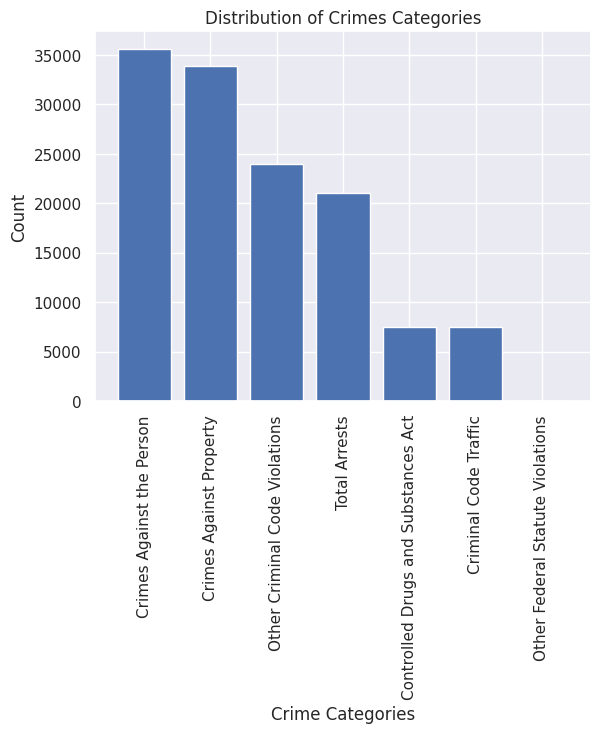

In [8]:
plt.bar(crimes_categories.keys(), crimes_categories.values())
plt.xticks(rotation=90)
plt.xlabel('Crime Categories')
plt.ylabel('Count')
plt.title('Distribution of Crimes Categories')

##Distribution by Neighbourhood.

{'NSA': 3765, 'Kensington-Chinatown (78)': 1826, 'York University Heights (27)': 1704, 'Downtown Yonge East (168)': 1674, 'Wellington Place (164)': 1640, 'Yorkdale-Glen Park (31)': 1559, 'St Lawrence-East Bayfront-The Islands (166)': 1520, 'Annex (95)': 1456, 'Eglinton East (138)': 1434, 'Bendale-Glen Andrew (156)': 1427}


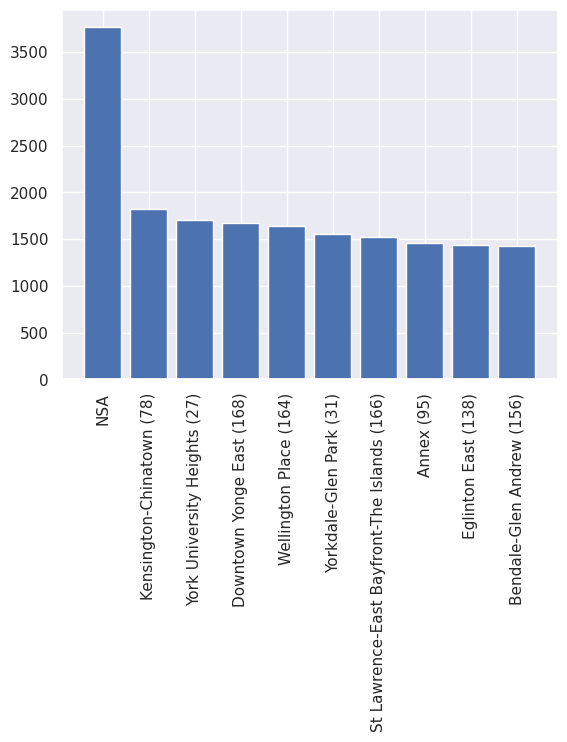

In [18]:
#Top 10 arrest Neighbourhoods
neighborhood = df['NEIGHBOURHOOD_158'].sort_values(ascending=True).value_counts().nlargest(10)

neigh_dict = neighborhood.to_dict()
print(neigh_dict)
plt.bar(neigh_dict.keys(), neigh_dict.values())
plt.xticks(rotation=90)
plt.show()

{'Lawrence Park North (105)': 308, 'Yonge-St.Clair (97)': 313, 'Lawrence Park South (103)': 367, 'Bayview Woods-Steeles (49)': 376, 'Leaside-Bennington (56)': 376, 'Lambton Baby Point (114)': 380, 'Steeles (116)': 392, 'Markland Wood (12)': 393, 'Forest Hill South (101)': 414, 'Humber Heights-Westmount (8)': 418}


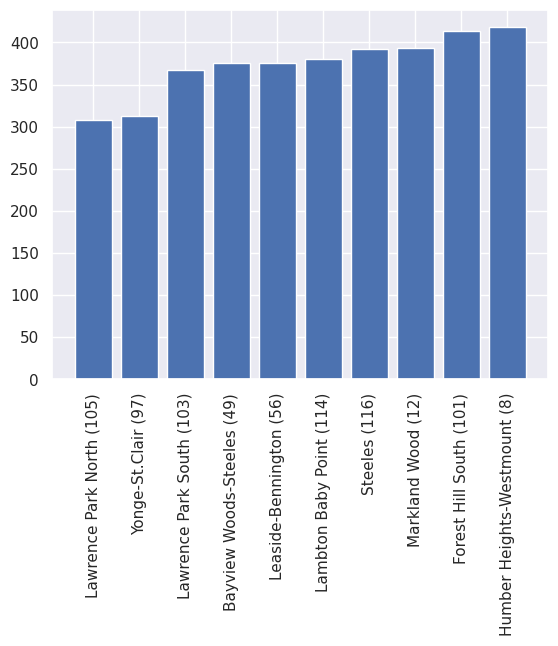

In [19]:
#Bottom 10 arrest Neighbourhoods
neighborhood = df['NEIGHBOURHOOD_158'].sort_values(ascending=True).value_counts().nsmallest(10)

neigh_dict = neighborhood.to_dict()
print(neigh_dict)
plt.bar(neigh_dict.keys(), neigh_dict.values())
plt.xticks(rotation=90)
plt.show()

In [30]:
year= df['ARREST_YEAR'].value_counts()
year_arrested ={'2016':15609,
'2014':15484,
'2017': 15350,
'2015':15138,
'2018':14620,
'2022':13821,
'2019':13658,
'2021':12912,
'2020':12782
}

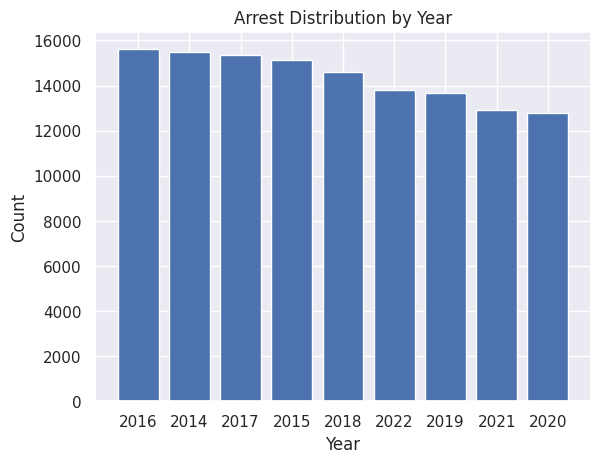

In [32]:
plt.bar(year_arrested.keys(), year_arrested.values())
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Arrest Distribution by Year')
plt.show()

Gender distribution by year.

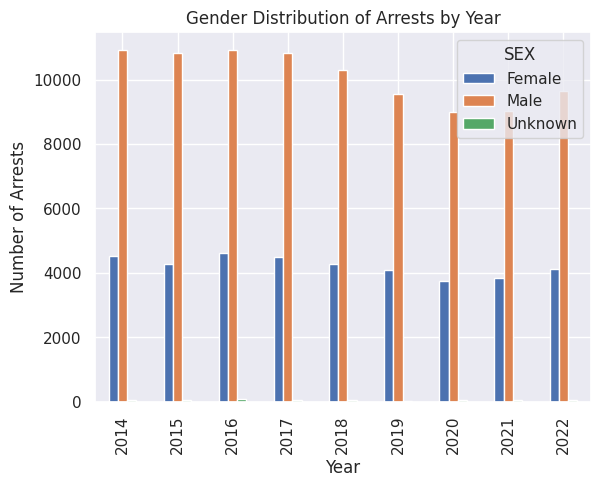

In [33]:
grouped_data = df.groupby(['ARREST_YEAR', 'SEX']).size().unstack()
grouped_data.plot(kind='bar', stacked=False)

plt.title('Gender Distribution of Arrests by Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.show()